                                                          DATA VISUALIZATION 

In [33]:
!pip install pandas matplotlib 
!pip install plotly


In [2]:
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as an
import numpy as np
import plotly.graph_objects as go
sn.set(color_codes=True)

In [9]:
match=pd.read_excel(r'C:\Users\Administrator\Downloads\matches.xlsx')

In [11]:
match.head()

Match_number            Team_1        Team_2        Date_of_match  \
0             1            Canada           USA  2024-02-06 00:00:00   
1             2  Papua New Guinea   West Indies  2024-02-06 00:00:00   
2             3              Oman       Namibia  2024-03-06 00:00:00   
3             4         Sri Lanka  South Africa  2024-03-06 00:00:00   
4             5       Afghanistan        Uganda  2024-04-06 00:00:00   

                                 Venue_stadium  Venue_city  Toss_winner  \
0                        Grand Prairie Stadium      Dallas          USA   
1                           Providence Stadium  Providence  West Indies   
2                              Kensington Oval  Bridgetown      Namibia   
3  Nassau County International Cricket Stadium    New York    Sri Lanka   
4                           Providence Stadium  Providence       Uganda   

  Toss_decision Match_result  Winning_team      Man_of_match  Win_by_runs  \
0          bowl       Played           USA       Aaron Jones          NaN   
1          bowl       Played   West Indies          RL Chase          NaN   
2          bowl       Played       Namibia           D Wiese         11.0   
3          bowl       Played  South Africa          A Nortje          NaN   
4          bowl       Played   Afghanistan  Fazalhaq Farooqi        125.0   

   Win_by_wickets   Match_type Super_over_match  
0             7.0  Group Stage               No  
1             5.0  Group Stage               No  
2             NaN  Group Stage              Yes  
3             6.0  Group Stage               No  
4             NaN  Group Stage               No

In [13]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_number      55 non-null     int64  
 1   Team_1            55 non-null     object 
 2   Team_2            55 non-null     object 
 3   Date_of_match     55 non-null     object 
 4   Venue_stadium     55 non-null     object 
 5   Venue_city        55 non-null     object 
 6   Toss_winner       52 non-null     object 
 7   Toss_decision     52 non-null     object 
 8   Match_result      55 non-null     object 
 9   Winning_team      51 non-null     object 
 10  Man_of_match      51 non-null     object 
 11  Win_by_runs       27 non-null     float64
 12  Win_by_wickets    24 non-null     float64
 13  Match_type        55 non-null     object 
 14  Super_over_match  55 non-null     object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.6+ KB


1.DISPLOT CHART

Text(0.5, 12.44444444444443, 'Toss_decision')

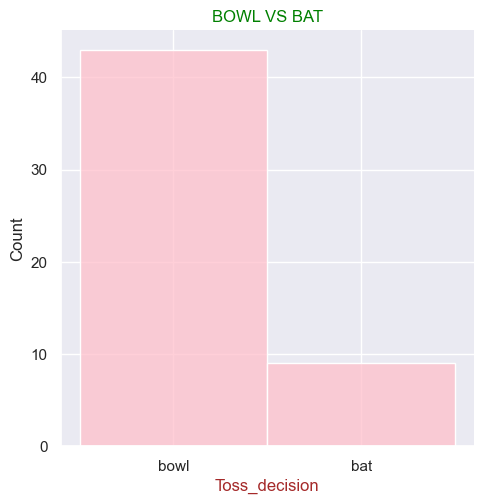

In [6]:
# displot

sn.displot(data=match,x="Toss_decision",color='pink')
an.title('BOWL VS BAT',color='Green')
an.xlabel('Toss_decision',color='Brown')


 2.JOINT PLOT

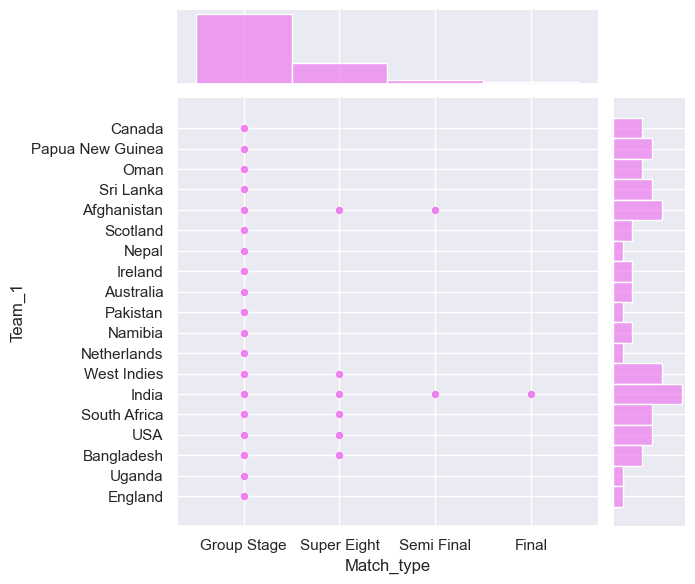

In [7]:
# joint plot

sn.jointplot(data=match, y="Team_1", x="Match_type",color='Violet')
an.show()

3.PIE CHART

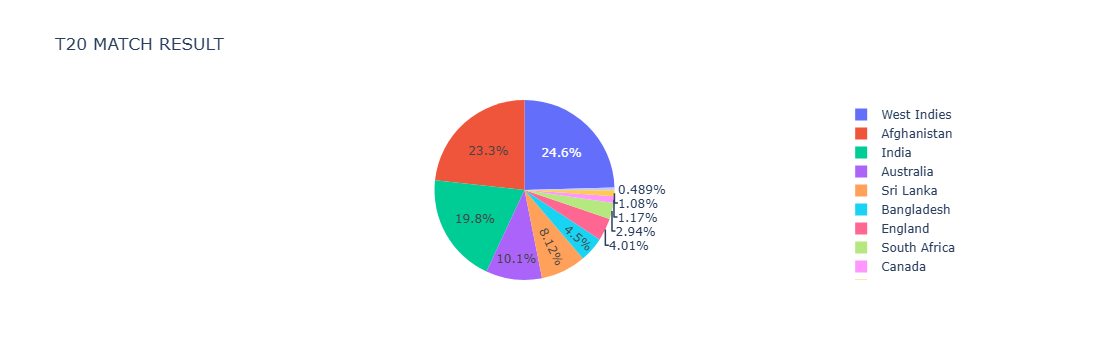

<Figure size 1000x800 with 0 Axes>

In [8]:
# pie chart

fig=px.pie(match,
            names='Winning_team',
            values='Win_by_runs',
            title='T20 MATCH RESULT')
an.figure(figsize=(10,8))

fig.show()

4.FUNNEL CHART

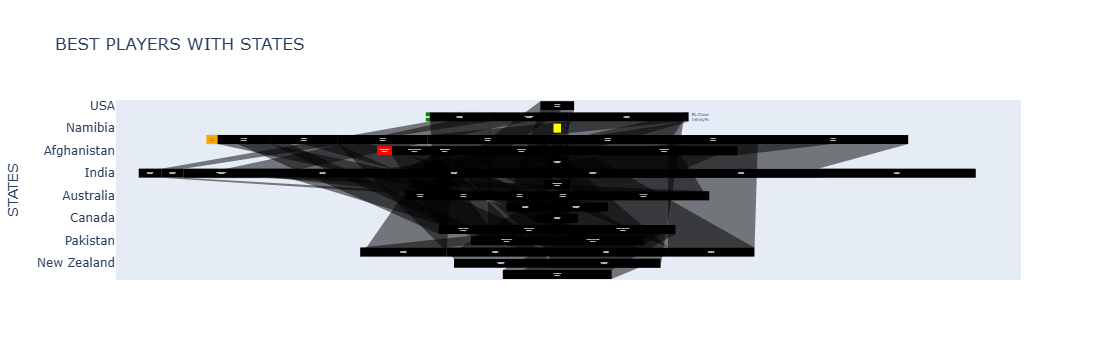

In [9]:
# funnel chart 

stages = match['Winning_team']
values = match['Man_of_match']

fig = go.Funnel(
    y = stages,
    x = values,
    textinfo = "value+percent initial",
    marker={"color": ["blue", "green", "yellow", "orange", "red"]}
)

layout = go.Layout(
    title="BEST PLAYERS WITH STATES",
    yaxis_title="STATES",
    xaxis_title="PLAYERS",
)

fig = go.Figure(data=fig, layout=layout)
fig.show()

5.HISTOGRAM CHART

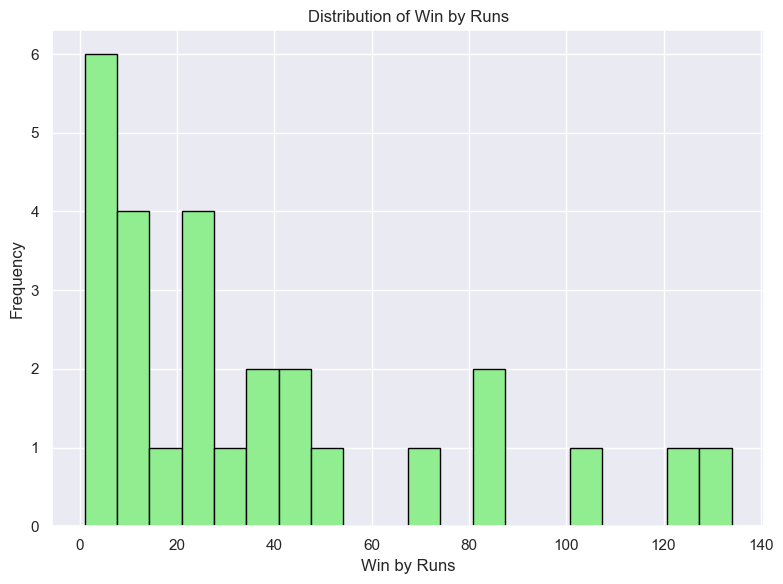

In [10]:
# Histogram

an.figure(figsize=(8, 6))
an.hist(match['Win_by_runs'].dropna(), bins=20, color='lightgreen', edgecolor='black')
an.title('Distribution of Win by Runs')
an.xlabel('Win by Runs')
an.ylabel('Frequency')
an.grid(True)
an.tight_layout()
an.show()


6.BOXPLOT CHART

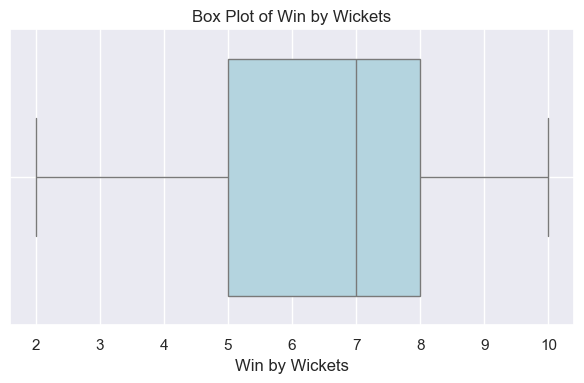

In [11]:
# Boxplot

an.figure(figsize=(6, 4))
sn.boxplot(x=match['Win_by_wickets'].dropna(), color='lightblue')
an.title('Box Plot of Win by Wickets')
an.xlabel('Win by Wickets')
an.grid(True)
an.tight_layout()

an.show()


7.HEATMAP CHART

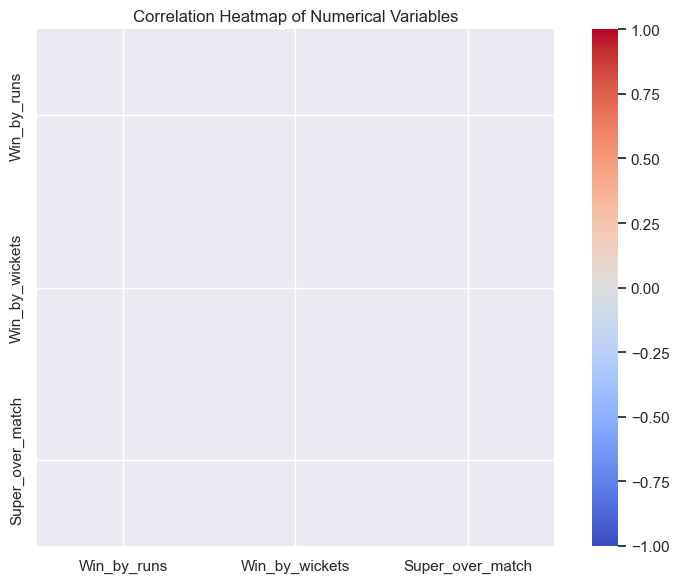

In [12]:
# Heatmap

numerical_columns = ['Win_by_runs', 'Win_by_wickets', 'Super_over_match']
match_numeric = match[numerical_columns].dropna()  # Drop rows with NaN values

corr_matrix = match_numeric.corr()

an.figure(figsize=(8, 6))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
an.title('Correlation Heatmap of Numerical Variables')
an.tight_layout()
an.show()


8.GANTT CHART

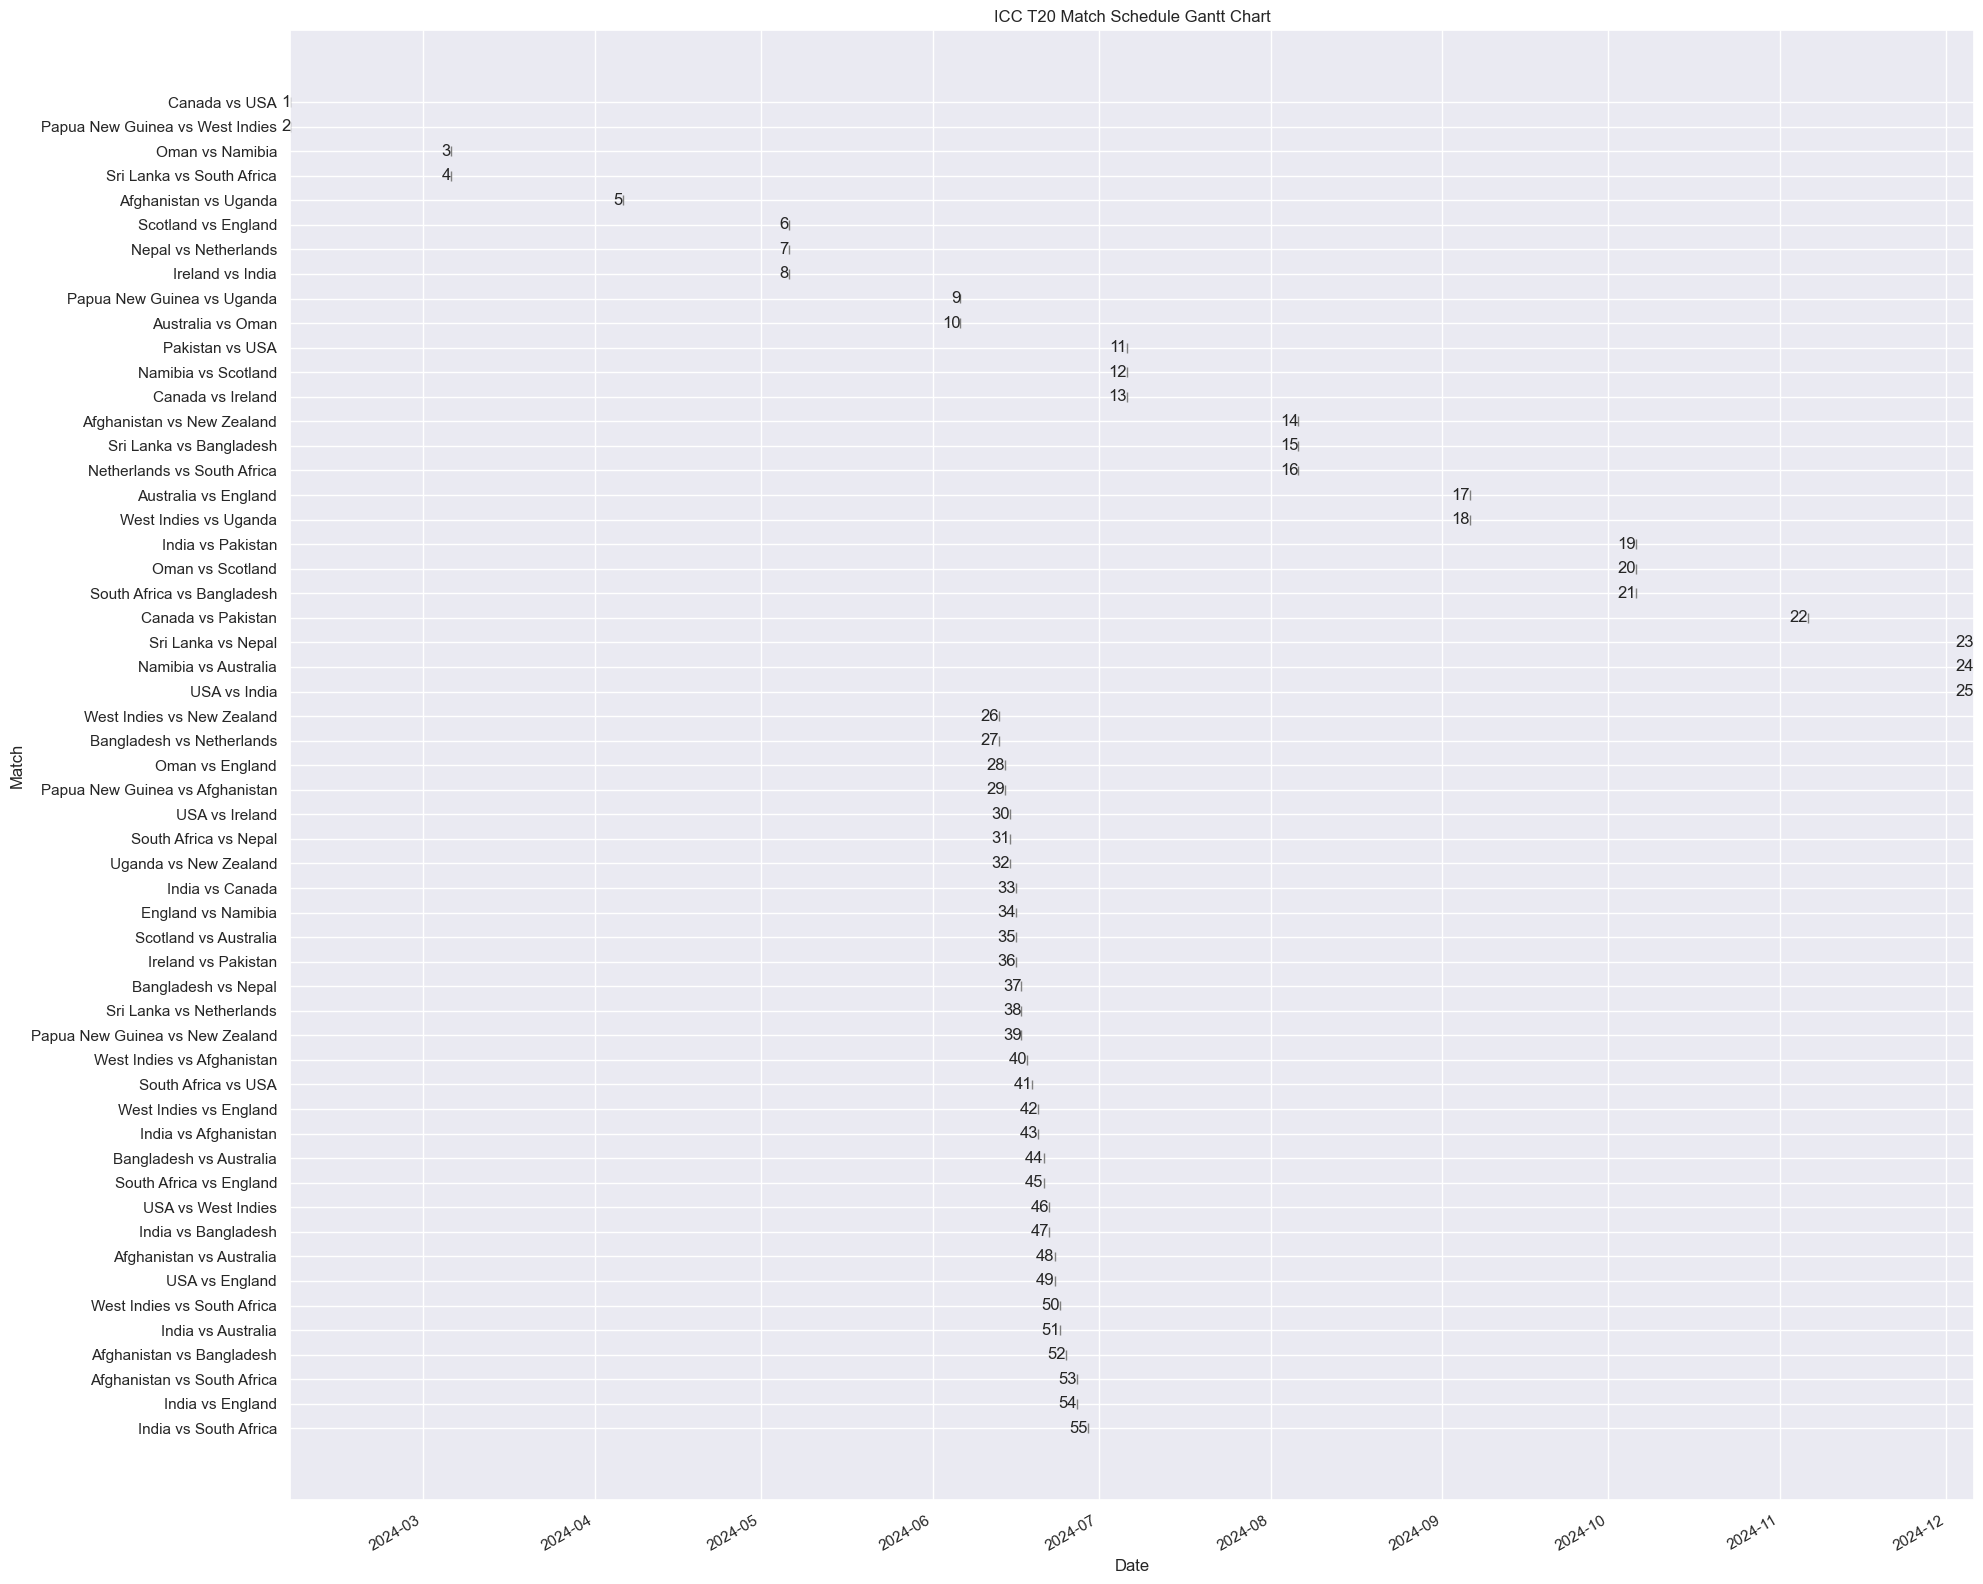

In [13]:
#  Create Gantt chart

match['Start'] = pd.to_datetime(match['Date_of_match'])
match['Finish'] = match['Start']  
match['Task'] = match['Team_1'] + ' vs ' + match['Team_2']

fig, ax = an.subplots(figsize=(20, 16))

for i, task in enumerate(match['Task']):
    ax.barh(task, width=(match['Finish'][i] - match['Start'][i]).days, left=match['Start'][i], height=0.4, align='center', edgecolor='grey', color='skyblue')
    ax.text(match['Start'][i], i, match['Match_number'][i], ha='right', va='center')

ax.set_title('ICC T20 Match Schedule Gantt Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Match')
ax.invert_yaxis()
ax.xaxis_date() 
fig.autofmt_xdate() 
an.grid(True)


an.tight_layout()
an.show()


9.BAR CHART

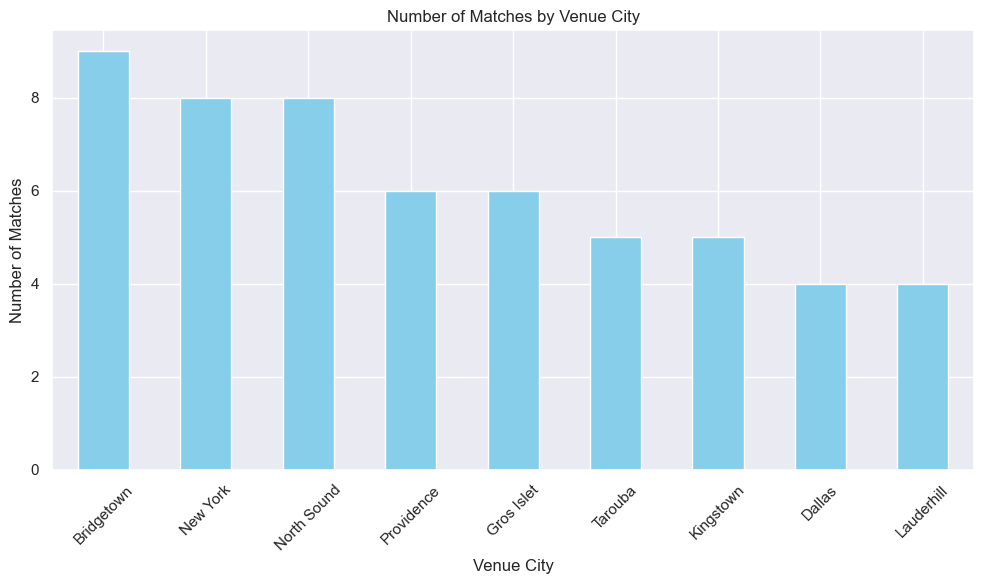

In [14]:
# bar chart

venue_city_counts = match['Venue_city'].value_counts().sort_values(ascending=False)

an.figure(figsize=(10, 6))
venue_city_counts.plot(kind='bar', color='skyblue')
an.title('Number of Matches by Venue City')
an.xlabel('Venue City')
an.ylabel('Number of Matches')
an.xticks(rotation=45)
an.tight_layout()

an.show()


10.SUNBURST CHART

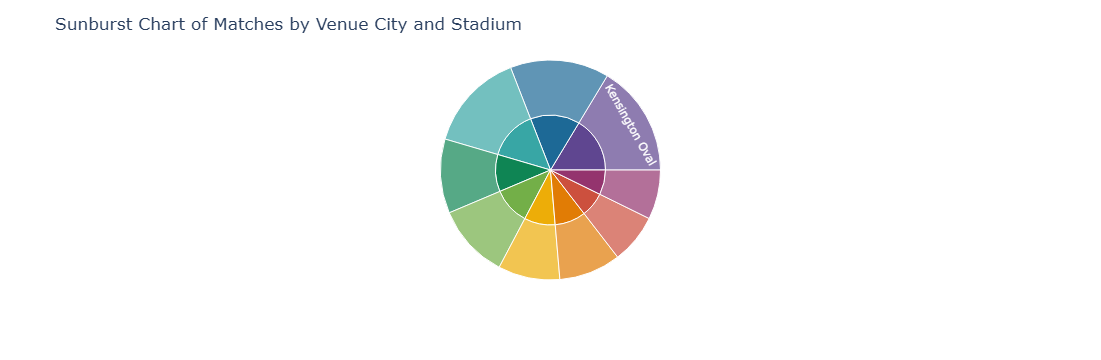

In [15]:
# sunburst chart

venue_counts = match.groupby(['Venue_city', 'Venue_stadium']).size().reset_index(name='Match_count')
fig = px.sunburst(venue_counts, path=['Venue_city', 'Venue_stadium'], values='Match_count')

fig.update_layout(
    title='Sunburst Chart of Matches by Venue City and Stadium',
    font=dict(size=12),
    uniformtext=dict(minsize=10, mode='hide'),
    sunburstcolorway=px.colors.qualitative.Prism,
)

fig.show()


11.COUNT PLOT CHART

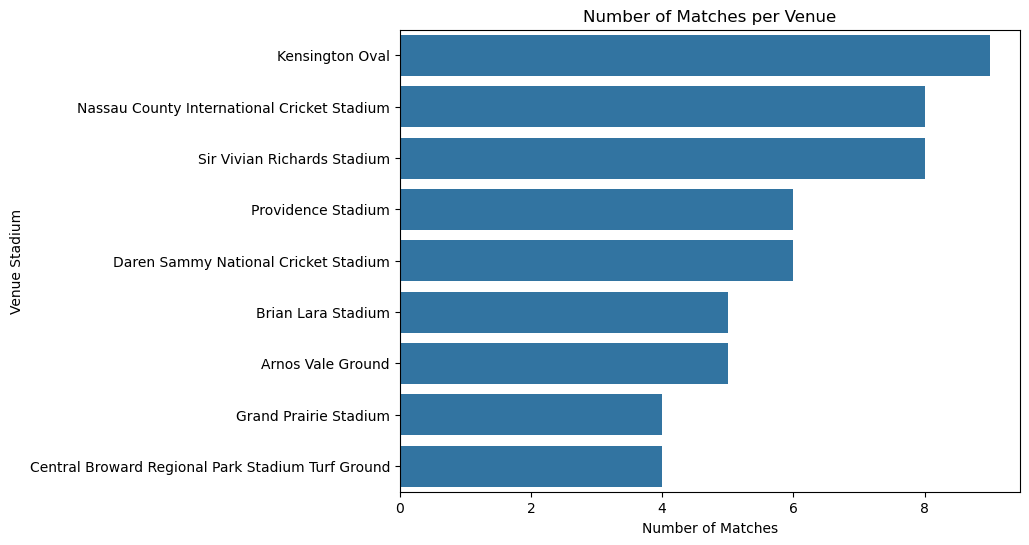

In [19]:
# Count plot for the number of matches per venue

an.figure(figsize=(8,6))
sn.countplot(y='Venue_stadium', data=match, order=match['Venue_stadium'].value_counts().index)
an.title('Number of Matches per Venue')
an.xlabel('Number of Matches')
an.ylabel('Venue Stadium')
an.show()


12.SANKEY DIAGRAM CHART

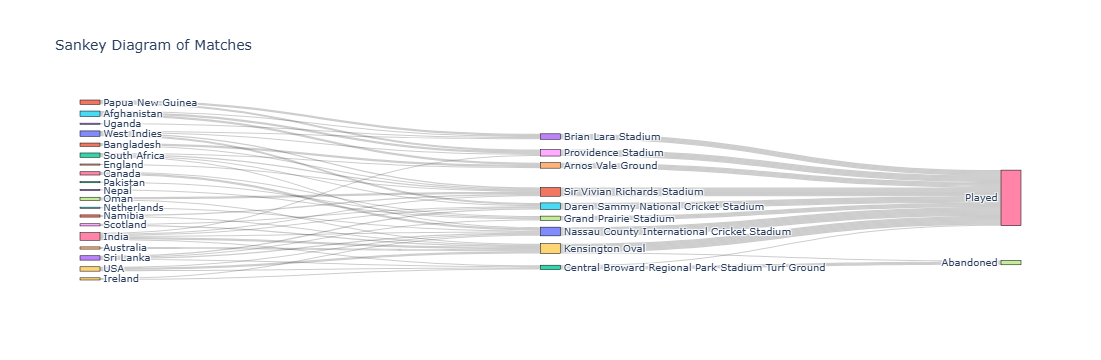

In [27]:
import pandas as pd
import plotly.graph_objects as go



# Define nodes
teams = list(match['Team_1'].unique()) + list(match['Team_2'].unique())
venues = list(match['Venue_stadium'].unique())
results = list(match['Match_result'].unique())

# Create a list of all unique labels
all_labels = teams + venues + results

# Create a mapping from label to index
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# Create source, target and value lists for Sankey diagram
sources = []
targets = []
values = []

# Flow from Team_1 to Venue_stadium
for _, row in match.iterrows():
    sources.append(label_to_index[row['Team_1']])
    targets.append(label_to_index[row['Venue_stadium']])
    values.append(1)

# Flow from Venue_stadium to Match_result
for _, row in match.iterrows():
    sources.append(label_to_index[row['Venue_stadium']])
    targets.append(label_to_index[row['Match_result']])
    values.append(1)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    ),
)])

fig.update_layout(title_text="Sankey Diagram of Matches", font_size=10)
fig.show()


13. CHOROPLETH MAP CHART

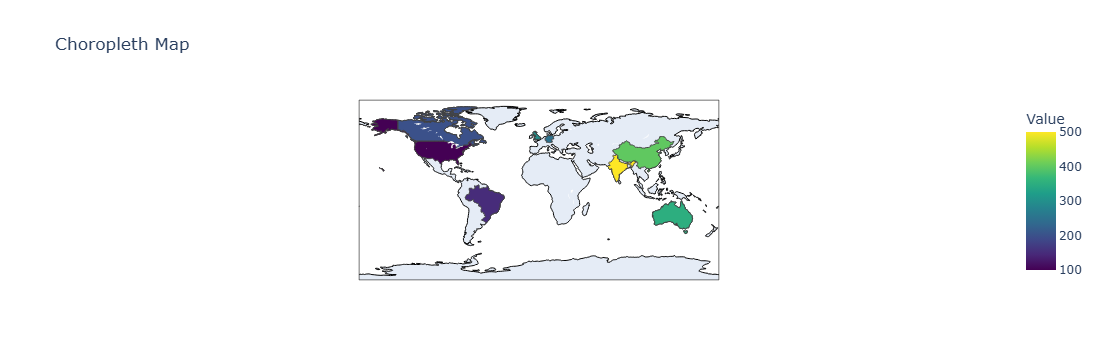

In [37]:
import pandas as pd
import plotly.express as px

# Sample data
data = {
    'Country': ['United States', 'Canada', 'Brazil', 'United Kingdom', 'Germany', 'India', 'China', 'Australia'],
    'Value': [100, 200, 150, 300, 250, 500, 400, 350]
}

match = pd.DataFrame(data)

# Create the Choropleth map
fig = px.choropleth(
    match,
    locations='Country',
    locationmode="country names",
    color='Value',
    hover_name='Country',
    hover_data={'Value': True},
    color_continuous_scale='Viridis',
    title='Choropleth Map '
)

# Update layout
fig.update_layout(
    geo=dict(showcoastlines=True, coastlinecolor='Black')
)

# Display the map
fig.show()
